In [44]:
from sklearn import model_selection, svm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, average_precision_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
#from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve, roc_auc_score

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.layers import Conv2D
from keras.layers import Conv1D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras import optimizers
from keras.layers import Conv1D
import numpy as np
import pandas as pd
import scipy
import sklearn
import os
from keras.optimizers import SGD #Stochastic Gradient Descent Optimizer


from keras.applications import inception_v3

# Data Extraction and Preparation

In [2]:
#Path to the Image Files
path_to_img = 'C:/Users/Nairomi/Desktop/Disaster/Data_Main/image/'
img_files=[pos_img for pos_img in os.listdir(path_to_img) if pos_img.endswith('.jpg')]
#Path To Text Files
#Path to the Image Files
path_to_text = 'C:/Users/Nairomi/Desktop/Disaster/Data_Main/text/'
text_files=[pos_text for pos_text in os.listdir(path_to_text) if pos_text.endswith('.txt')]

In [3]:
print(len(img_files))
print(len(text_files))

5879
5831


In [4]:
#Removing Extension From all the Names To A New List
name_files = [x[:-4] for x in img_files]
print(len(name_files))

5879


In [5]:
#Creating a Dataframe To Store Text Files and the Names of the Data
main_data=pd.DataFrame()
main_data['filename']=name_files

### Text Data

In [6]:
data_list=[]
for index in text_files:
    text_file=os.path.join(path_to_text,index)
    text_data=open(text_file,'r', encoding="utf8")
    data=text_data.read()
    data_list.append(data)

In [7]:
#Removing Extension From all the Names To A New List
name_files = [x[:-4] for x in text_files]
print(len(name_files))

5831


In [8]:
text_data=pd.DataFrame()
text_data['filename']=name_files
text_data['text_data']=data_list

In [9]:
main_data=pd.merge(main_data, text_data, on='filename', how='left')

In [10]:
main_data['img_path']=str(path_to_img)+main_data['filename']+str('.jpg')

In [11]:
main_data.head()

,filename,text_data,img_path
0,accrafloods_2015-06-04_22-22-16,#odorna #odornamarket #accrafloods #photograph...,C:/Users/Nairomi/Desktop/Disaster/Data_Main/im...
1,accrafloods_2015-06-04_22-54-13,One of the houses affected by the blast. #odor...,C:/Users/Nairomi/Desktop/Disaster/Data_Main/im...
2,accrafloods_2015-06-05_08-03-39,03/06/15 #NeverAgain #AccraFloods #PrayforGhana,C:/Users/Nairomi/Desktop/Disaster/Data_Main/im...
3,accrafloods_2015-06-05_08-08-35,Goil filling station on fire\n#hmm \n#accrafloods,C:/Users/Nairomi/Desktop/Disaster/Data_Main/im...
4,accrafloods_2015-06-05_12-22-10,@Regrann from @flavamatik: So my big sister se...,C:/Users/Nairomi/Desktop/Disaster/Data_Main/im...


### Label Neutralisation
The Dataset for the Label Neutralisation to 6 Classes has been derived From an External Replicatred Data Set without merging Stored in the E Drive

In [12]:
#Class 1 - damaged_infrastructure
path_to_img = 'E:/Lab Work and Codes/multimodal/damaged_infrastructure/images'
img_files_di=[pos_img for pos_img in os.listdir(path_to_img) if pos_img.endswith('.jpg')]
img_files_di = [x[:-4] for x in img_files_di]
print(len(img_files_di))

#Class 2 - damaged_nature
path_to_img = 'E:/Lab Work and Codes/multimodal/damaged_nature/images'
img_files_dn=[pos_img for pos_img in os.listdir(path_to_img) if pos_img.endswith('.jpg')]
img_files_dn = [x[:-4] for x in img_files_dn]
print(len(img_files_dn))

#Class 3 - fires
path_to_img = 'E:/Lab Work and Codes/multimodal/fires/images'
img_files_fires=[pos_img for pos_img in os.listdir(path_to_img) if pos_img.endswith('.jpg')]
img_files_fires = [x[:-4] for x in img_files_fires]
print(len(img_files_fires))      
      
#Class 4 - damaged_infrastructure
path_to_img = 'E:/Lab Work and Codes/multimodal/flood/images'
img_files_flood=[pos_img for pos_img in os.listdir(path_to_img) if pos_img.endswith('.jpg')]
img_files_flood = [x[:-4] for x in img_files_flood]
print(len(img_files_flood))       
      
#Class 5 - damaged_infrastructure
path_to_img = 'E:/Lab Work and Codes/multimodal/human_damage/images'
img_files_hd=[pos_img for pos_img in os.listdir(path_to_img) if pos_img.endswith('.jpg')]
img_files_hd = [x[:-4] for x in img_files_hd]
print(len(img_files_hd))       
      
#Class 6  - damaged_infrastructure
path_to_img = 'E:/Lab Work and Codes/multimodal/non_damage/images'
img_files_nd=[pos_img for pos_img in os.listdir(path_to_img) if pos_img.endswith('.jpg')]
img_files_nd = [x[:-4] for x in img_files_nd]
print(len(img_files_nd))  

1418
515
349
385
240
2972


In [13]:
def neutralisation_6(label):
    if(label in img_files_di):
        return 'damaged_infrastructure'
    elif(label in img_files_dn):
        return 'damaged_nature'
    elif(label in img_files_fires):
        return 'fires'
    elif(label in img_files_flood):
        return 'flood'
    elif(label in img_files_hd):
        return 'human_damage'
    elif(label in img_files_nd):
        return 'non_damage'
    else:
        return 'others'

In [14]:
main_data['labels']=main_data['filename'].apply(neutralisation_6)

In [15]:
main_data['labels'].value_counts()

non_damage                2972
damaged_infrastructure    1418
damaged_nature             515
flood                      385
fires                      349
human_damage               240
Name: labels, dtype: int64

### Training and Testing For Complete Dataset

This Part of the Split Will help us to Randomize the Complete Dataset and The Labels

In [144]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(main_data, main_data['labels'], test_size = 0.3, random_state =9, stratify=main_data['labels'])

#### Reading Image From the Training Set

In [145]:
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
image_pixel_data_train=[]
for i in train_features['img_path']:
    img_path=os.path.join(path_to_img,i)
    img =Image.open(img_path).convert('RGB')
    img=img.resize((128, 128))
    image_pixel_data_train.append(np.asarray(img))   

In [146]:
image_label_data_train=np.asarray(train_labels)

In [147]:
image_pixel_data_train=np.asarray(image_pixel_data_train)
image_label_data_train=np.asarray(image_label_data_train)

In [148]:
classes=train_labels.nunique()
print(classes)

6


In [149]:
#Data Shape Fix
nRows,nCols,nDims = image_pixel_data_train.shape[1:]
input_shape=(nRows,nCols,nDims)
image_pixel_data_train = image_pixel_data_train.reshape(image_pixel_data_train.shape[0], nRows, nCols, nDims)
print("Shape of The Complete Data Set is "+ str(image_pixel_data_train.shape))

Shape of The Complete Data Set is (4115, 128, 128, 3)


#### Reading Image From the Test Set

In [150]:
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
image_pixel_data_test=[]
for i in test_features['img_path']:
    img_path=os.path.join(path_to_img,i)
    img =Image.open(img_path).convert('RGB')
    img=img.resize((128, 128))
    image_pixel_data_test.append(np.asarray(img)) 

In [151]:
image_label_data_test=np.asarray(test_labels)

In [152]:
image_pixel_data_test=np.asarray(image_pixel_data_test)
image_label_data_test=np.asarray(image_label_data_test)

In [153]:
classes=test_labels.nunique()
print(classes)

6


In [154]:
#Data Shape Fix
nRows,nCols,nDims = image_pixel_data_test.shape[1:]
input_shape=(nRows,nCols,nDims)
image_pixel_data_test = image_pixel_data_test.reshape(image_pixel_data_test.shape[0], nRows, nCols, nDims)
print("Shape of The Complete Test Data Set is "+ str(image_pixel_data_test.shape))

Shape of The Complete Test Data Set is (1764, 128, 128, 3)


The List with the Image And the Labels are
#### image_pixel_data ------------- Images
#### image_label_data ------------- Labels

### Data Preprocessing

In [155]:
#### Training
# Change to float datatype
image_pixel_data_train = image_pixel_data_train.astype('float32')
#Scale The Data from "0 to 255" to "0 to 1"
image_pixel_data_train=image_pixel_data_train/255

#### Testing
# Change to float datatype
image_pixel_data_test = image_pixel_data_test.astype('float32')
#Scale The Data from "0 to 255" to "0 to 1"
image_pixel_data_test=image_pixel_data_test/255

In [156]:
image_label_data_train = image_label_data_train.reshape(image_label_data_train.shape[0],1)
image_label_data_test = image_label_data_test.reshape(image_label_data_test.shape[0],1)

### Train and Test Split

In [157]:
#Converting the Labels to be Categorical
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

image_label_data_train=enc.fit_transform(image_label_data_train).toarray()
image_label_data_test=enc.fit_transform(image_label_data_test).toarray()

In [158]:
print("The Shape of Train Data is "+ str(image_pixel_data_train.shape))
print("The Shape of Test Data is "+str(image_pixel_data_test.shape))
print("The Shape of Train Label is "+ str(image_label_data_train.shape))
print("The Shape of Test Label is "+str(image_label_data_test.shape))

The Shape of Train Data is (4115, 128, 128, 3)
The Shape of Test Data is (1764, 128, 128, 3)
The Shape of Train Label is (4115, 6)
The Shape of Test Label is (1764, 6)


## Transfer Learning

In [209]:
import livelossplot
from livelossplot import PlotLossesKeras
plot_losses = livelossplot.PlotLossesKeras()

In [210]:
#Load the VGG model
#vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
 
#Load the ResNet50 model
#resnet_model = resnet50.ResNet50(weights='imagenet')
 
##Load the Inception_V4 model
#inception_model_v4 = inception_v4.InceptionV4(weights='imagenet')

In [211]:
inception_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_753 (Conv2D)             (None, 63, 63, 32)   864         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_753 (BatchN (None, 63, 63, 32)   96          conv2d_753[0][0]                 
__________________________________________________________________________________________________
activation_753 (Activation)     (None, 63, 63, 32)   0           batch_normalization_753[0][0]    
__________________________________________________________________________________________________
conv2d_754

In [212]:
model = Sequential()
model.add(inception_model)

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(classes, activation='softmax'))

In [213]:
batch_size = 10
epochs = 100

In [214]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2, 2, 2048)        21802784  
_________________________________________________________________
flatten_13 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 774       
Total params: 22,852,262
Trainable params: 22,817,830
Non-trainable params: 34,432
_________________________________________________________________


In [215]:
print("Number of Trainable Weights Before Freezing The Convolution Base", len(model.trainable_weights))
inception_model.trainable=False
print("Number of Trainable Weights After Freezing The Convolution Base", len(model.trainable_weights))

Number of Trainable Weights Before Freezing The Convolution Base 192
Number of Trainable Weights After Freezing The Convolution Base 4


In [216]:
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='categorical_hinge', metrics=['accuracy'])
#model.compile(optimizer=sgd , loss='categorical_crossentropy', metrics=['accuracy'])

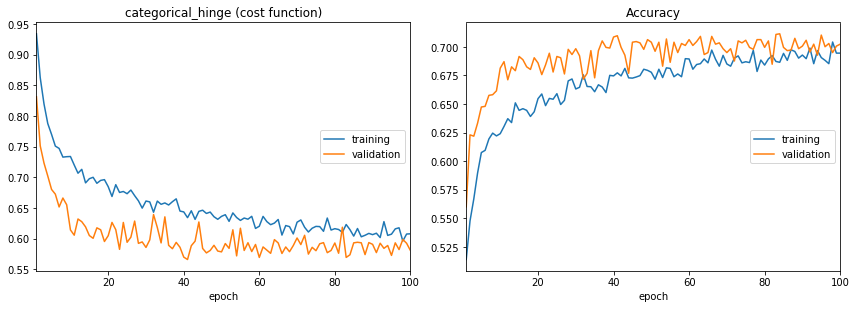

categorical_hinge (cost function):
training   (min:    0.596, max:    0.934, cur:    0.608)
validation (min:    0.566, max:    0.831, cur:    0.581)

Accuracy:
training   (min:    0.514, max:    0.704, cur:    0.695)
validation (min:    0.560, max:    0.711, cur:    0.702)


In [217]:
history = model.fit(image_pixel_data_train, 
                     image_label_data_train, 
                     batch_size=batch_size,
                     epochs=epochs, verbose=1, 
                     validation_data=(image_pixel_data_test, image_label_data_test),
                     callbacks=[plot_losses])

In [218]:
scores = model.evaluate(image_pixel_data_test, image_label_data_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

1764/1764 [==============================] - 3s 2ms/step

acc: 70.24%


In [219]:
def text_to_num(labe):
    arr=[]
    for i in range(len(labe)):
        if(labe[i]=='damaged_infrastructure'):
            arr.append(0)
        elif(labe[i]=='damaged_nature'):
            arr.append(1)
        elif(labe[i]=='fires'):
            arr.append(2)
        elif(labe[i]=='flood'):
            arr.append(3)
        elif(labe[i]=='human_damage'):
            arr.append(4)
        elif(labe[i]=='non_damage'):
            arr.append(5)
        else:
            arr.append(100)
    return arr

In [220]:
predictions=model.predict_classes(image_pixel_data_test)
test_labels=enc.inverse_transform(image_label_data_test)
test_labels=text_to_num(test_labels)
print(accuracy_score(test_labels, predictions))
print(confusion_matrix(test_labels, predictions))
print(classification_report(test_labels, predictions))

0.7023809523809523
[[285   4   3  27   3 103]
 [ 73  13   6  27   1  35]
 [  7   1  72   3   0  22]
 [ 19   2   1  61   0  32]
 [  6   0   0   6  17  43]
 [ 71   2  12  16   0 791]]
              precision    recall  f1-score   support

           0       0.62      0.67      0.64       425
           1       0.59      0.08      0.15       155
           2       0.77      0.69      0.72       105
           3       0.44      0.53      0.48       115
           4       0.81      0.24      0.37        72
           5       0.77      0.89      0.82       892

   micro avg       0.70      0.70      0.70      1764
   macro avg       0.67      0.52      0.53      1764
weighted avg       0.70      0.70      0.67      1764

